In [ ]:
"""Given the normalized dataset of bank loan with 8 feature and 1 target feature  both in sperate csv files.
Training Data File Format: P4.csv file contains input attributes (x1, x2, … , x8) in 8 columns. 
The P4y.csv file contains one column representing the Boolean class label (y). 
Each row is a training instance. 
your job is to: 
1) split the datasets into train and test sets using sklearn with test_size=0.2
2) Find out the best value of K with maximum mean accuracy using iterations for K nearest neighbour
3) print the best K value along with maximum accuracy value

note:
you can use numpy genfromtext to read csv file since it doesn't contain headers

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
from numpy import genfromtxt
my_data = genfromtxt('P4.csv', delimiter=',')
print(my_data)

[[ 0.516  0.921  2.33  ... -0.382  1.14  -0.87 ]
 [ 0.516  0.921  0.342 ...  2.62  -0.88  -0.87 ]
 [ 0.516 -0.959 -0.653 ... -0.382 -0.88   1.15 ]
 ...
 [-1.31  -0.959  1.34  ... -0.382 -0.88   1.15 ]
 [ 0.516  0.921 -0.487 ... -0.382 -0.88   1.15 ]
 [ 0.516  0.921 -0.819 ... -0.382 -0.88   1.15 ]]


In [22]:
my_datay = genfromtxt('P4y.csv', delimiter=',')
print(my_datay)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

,A,B,C,D,E,F,G,H
0,0.516,0.921,2.330,-0.421,-1.210,-0.382,1.14,-0.87
1,0.516,0.921,0.342,2.380,-1.210,2.620,-0.88,-0.87
2,0.516,-0.959,-0.653,-0.421,-1.210,-0.382,-0.88,1.15
3,0.516,0.921,-0.487,2.380,0.829,-0.382,-0.88,1.15
4,0.516,0.921,-0.322,-0.421,0.829,-0.382,-0.88,1.15


,Result
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( my_data, my_datay, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


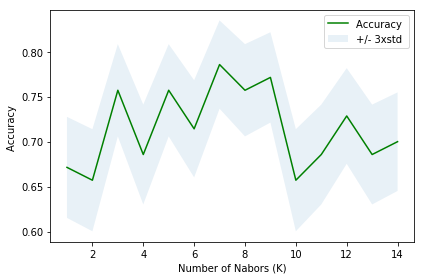

The best accuracy was with 0.7857142857142857 with k= 7


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 